In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


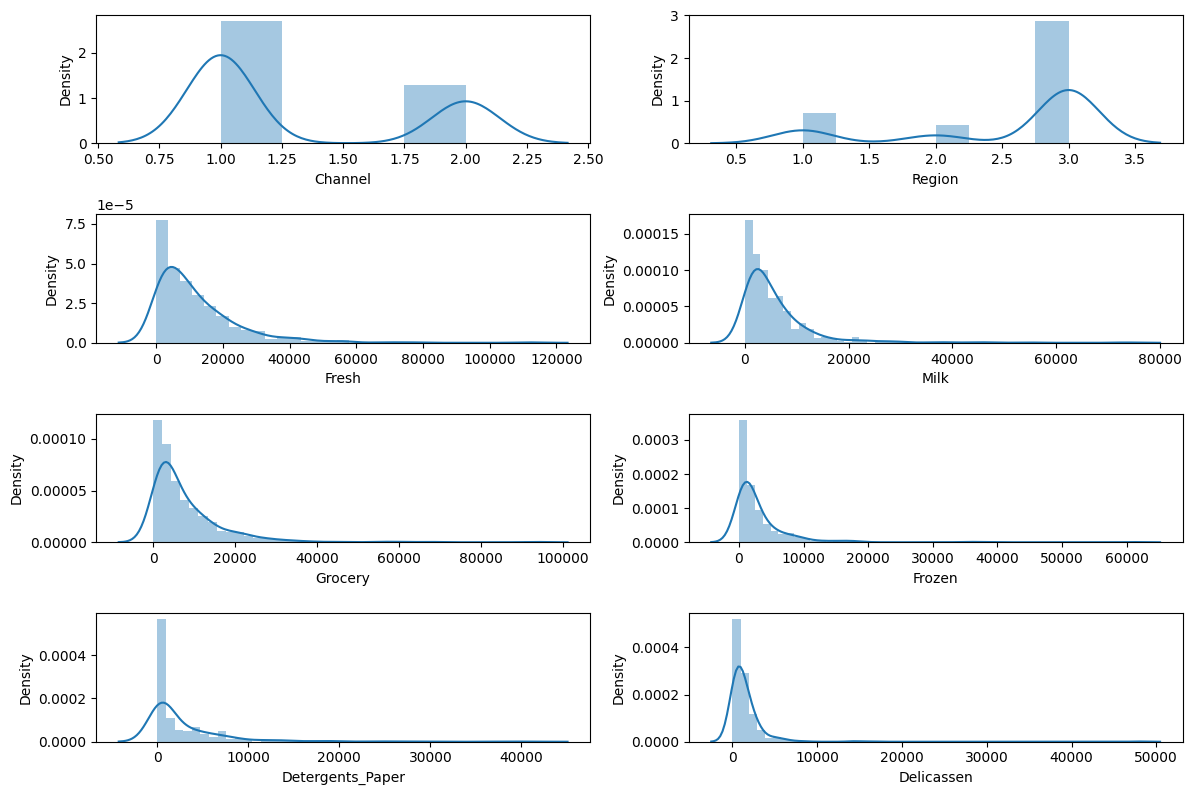

In [3]:
i=1
plt.figure(figsize=(12,8))
for col in df.columns:
    plt.subplot(4,2,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout(pad=0.9)
plt.show()

In [4]:
df.drop(columns=['Channel','Region'],inplace=True)
df.head()
#Drop the channel and Region columns as we do cluster the customers upon the purchases

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
X=df.iloc[:,:]
col=X.columns

In [6]:
from sklearn.preprocessing import MinMaxScaler
mxscaler = MinMaxScaler()
X = mxscaler.fit_transform(X)
X

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [7]:
X=pd.DataFrame(X,columns=col)
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...
435,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


In [9]:
X = X.values
X

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

### K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=4 ,init='k-means++', random_state=0)
Kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [12]:
y_pred = Kmeans.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 2, 1, 0, 0, 3, 1, 0, 0, 0, 3, 0, 1, 0, 3,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 2,
       0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

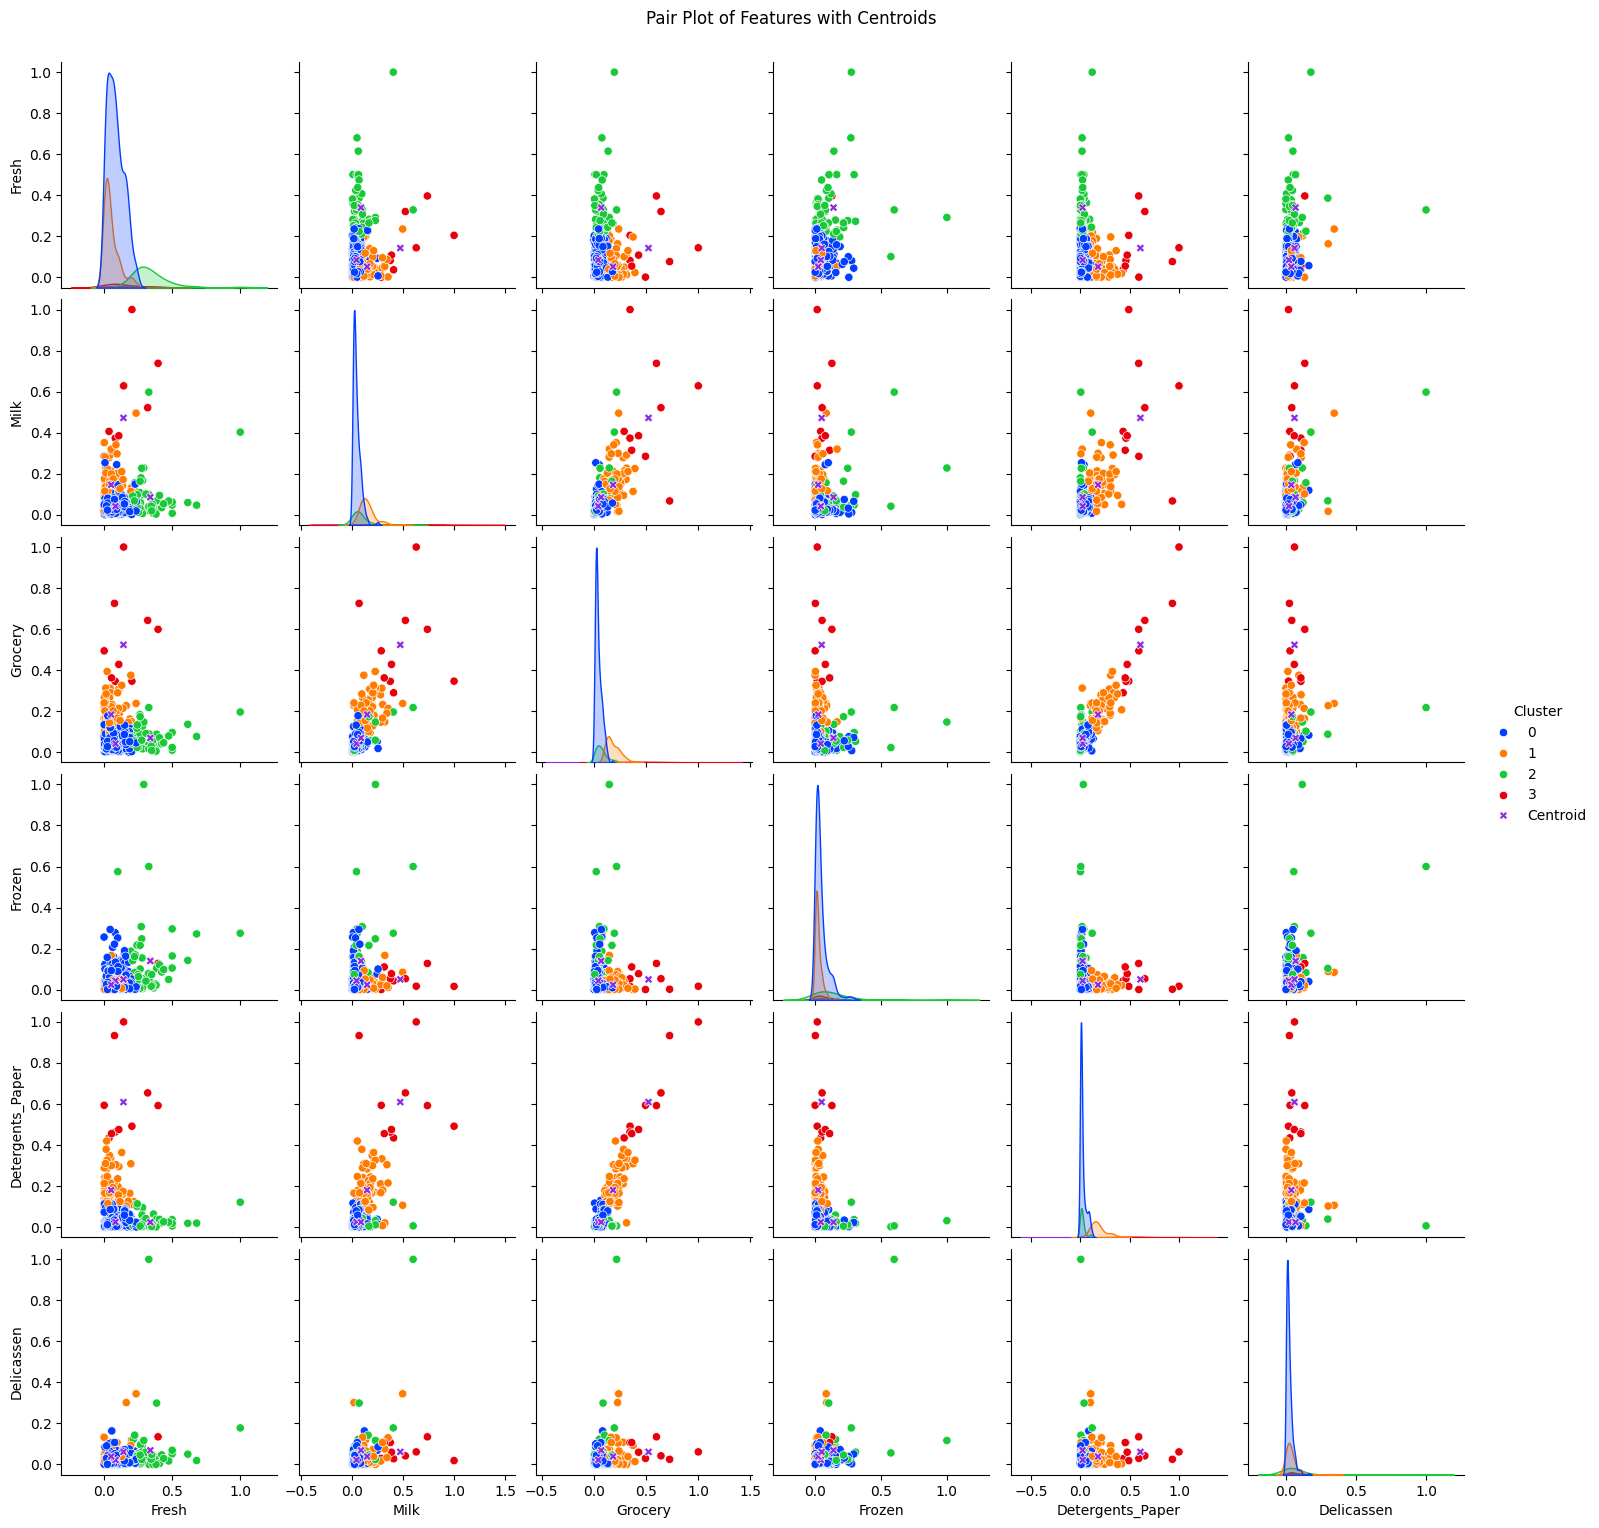

In [13]:
features = df.columns
data = pd.DataFrame(X, columns=features)

data['Cluster'] = y_pred

centroids_df = pd.DataFrame(Kmeans.cluster_centers_, columns=features)
centroids_df['Cluster'] = ['Centroid'] * Kmeans.n_clusters

combined_df = pd.concat([data, centroids_df], ignore_index=True)

sns.pairplot(combined_df, hue='Cluster', palette='bright', markers=['o']*Kmeans.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()


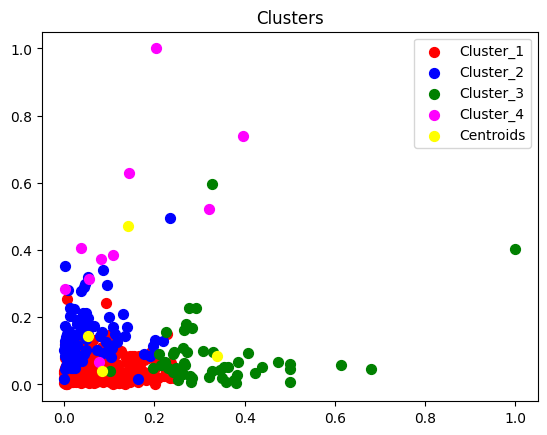

In [14]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], s=50, c='red', label='Cluster_1')  ##Fresh
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], s=50, c='blue', label='Cluster_2')  ## Milk
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], s=50, c='green', label='Cluster_3')   ##Grocery
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], s=50, c='Magenta', label='Cluster_4')  ## Frozen

plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

### Fuzzy C-Means Clustering

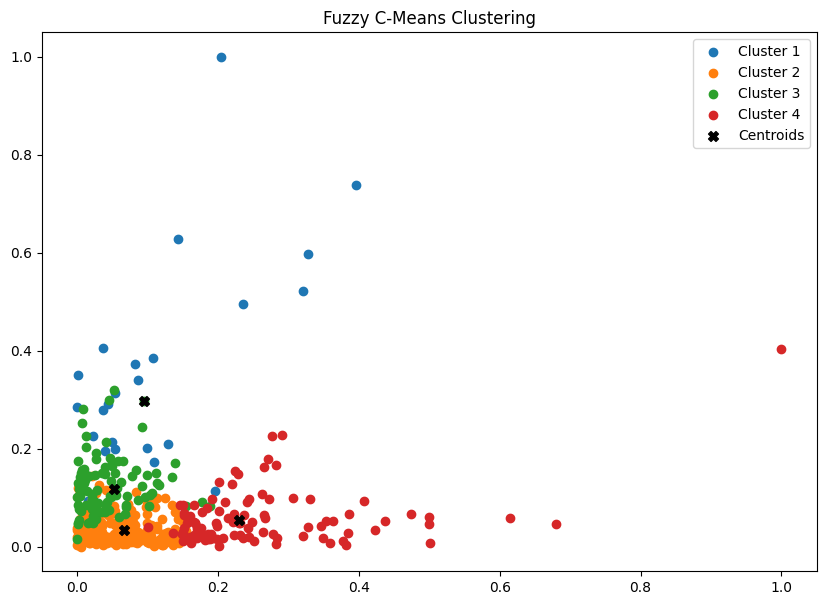

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
df.drop(columns=['Channel', 'Region'], inplace=True)

# Extract the features
X = df.values

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Fuzzy C-Means Clustering
n_clusters = 4
fcm = FCM(n_clusters=n_clusters)
fcm.fit(X_scaled)

# Predict the cluster for each data point
y_pred = fcm.predict(X_scaled)

# Centroids of the clusters
centers = fcm.centers

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# Plot the clusters
plt.figure(figsize=(10, 7))

# Plot each cluster
for i in range(n_clusters):
    plt.scatter(X_scaled[y_pred == i, 0], X_scaled[y_pred == i, 1], label=f'Cluster {i+1}')

# Mark the centroids, but only add the label once
for i in range(n_clusters):
    if i == 0:
        plt.scatter(centers[i, 0], centers[i, 1], marker='X', s=50, c='black', label='Centroids')
    else:
        plt.scatter(centers[i, 0], centers[i, 1], marker='X', s=50, c='black')

plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()


In [19]:
pip install fuzzy_c_means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.15.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
